In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [109]:
df= pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [111]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [112]:
df.isnull().sum()
df.dropna(inplace=True)

In [113]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [114]:
loyal_customers = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customers = df[df["Customer Type"] == "disloyal Customer"]

In [115]:
loyal_customers=loyal_customers.sample(20000)
loyal_customers.shape

(20000, 12)

In [116]:
balanced_df = pd.concat([loyal_customers, disloyal_customers], axis=0)
balanced_df.shape

(38905, 12)

In [117]:
cat_col= balanced_df.select_dtypes(include=['object'])
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
97993,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
64887,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
236,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
79819,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
58718,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [118]:
num_col= balanced_df.select_dtypes(exclude=['object'])
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
97993,48,1670,4,4,4,0,0.0
64887,13,760,4,5,4,0,0.0
236,65,578,3,3,3,99,101.0
79819,70,382,3,4,3,0,0.0
58718,62,453,3,1,3,0,13.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [119]:
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
97993,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
64887,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
236,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
79819,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
58718,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [120]:
## one hot encoding
cat_col = pd.get_dummies(cat_col, drop_first=True).astype(int)           # drop_first=True avoids dummy variable trap
cat_col

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
97993,1,0,1,1,0,0
64887,0,0,1,1,0,0
236,0,0,1,1,0,0
79819,1,0,1,1,0,0
58718,1,0,1,1,0,0
...,...,...,...,...,...,...
103892,0,1,0,0,0,0
103895,0,1,0,1,0,0
103899,0,1,0,1,0,0
103901,1,1,0,0,0,0


In [121]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
ohe= OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       ...,
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [122]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male_1',
 'Customer Type_disloyal Customer_1',
 'Type of Travel_Personal Travel_1',
 'Class_Eco_1',
 'Class_Eco Plus_1',
 'satisfaction_satisfied_1']

In [123]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0


In [124]:
one_hot= one_hot.reset_index(drop=True)
num_col= num_col.reset_index(drop=True)
# final_df=pd.concat([one_hot,num_col],axis=1)
# final_df.head()

In [125]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,48,1670,4,4,4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,13,760,4,5,4,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,65,578,3,3,3,99,101.0,0.0,0.0,1.0,1.0,0.0,0.0
3,70,382,3,4,3,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,62,453,3,1,3,0,13.0,1.0,0.0,1.0,1.0,0.0,0.0


In [126]:
## x and y --> train test split ---> algo traning

In [127]:
matrix = final_df.corr()
matrix       

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
Age,1.000000,0.140146,0.075169,-0.053230,0.058050,-0.008002,-0.009489,0.011020,-0.376788,0.077540,-0.176676,0.021747,0.117885
Flight Distance,0.140146,1.000000,0.120058,0.047334,0.090932,0.003981,-0.000381,0.010489,-0.331512,-0.129571,-0.341160,-0.080799,0.282887
Inflight entertainment,0.075169,0.120058,1.000000,0.244459,0.799030,-0.015011,-0.020069,0.015244,-0.137751,-0.065063,-0.119556,-0.030188,0.277994
Baggage handling,-0.053230,0.047334,0.244459,1.000000,0.058318,-0.017097,-0.021292,0.033649,0.033154,-0.032777,-0.204850,-0.066492,0.226242
Cleanliness,0.058050,0.090932,0.799030,0.058318,1.000000,-0.000332,-0.002535,0.008629,-0.108281,-0.019699,-0.079803,-0.020601,0.208216
Departure Delay in Minutes,-0.008002,0.003981,-0.015011,-0.017097,-0.000332,1.000000,0.963491,0.009012,0.006179,-0.014280,0.015511,0.006780,-0.040139
Arrival Delay in Minutes,-0.009489,-0.000381,-0.020069,-0.021292,-0.002535,0.963491,1.000000,0.006972,0.005817,-0.012660,0.020347,0.008944,-0.048998
Gender_Male_1,0.011020,0.010489,0.015244,0.033649,0.008629,0.009012,0.006972,1.000000,-0.036493,0.017474,-0.003004,-0.032910,0.022645
Customer Type_disloyal Customer_1,-0.376788,-0.331512,-0.137751,0.033154,-0.108281,0.006179,0.005817,-0.036493,1.000000,-0.469045,0.148405,-0.086467,-0.249097
Type of Travel_Personal Travel_1,0.077540,-0.129571,-0.065063,-0.032777,-0.019699,-0.014280,-0.012660,0.017474,-0.469045,1.000000,0.328518,0.109829,-0.267472


<Axes: >

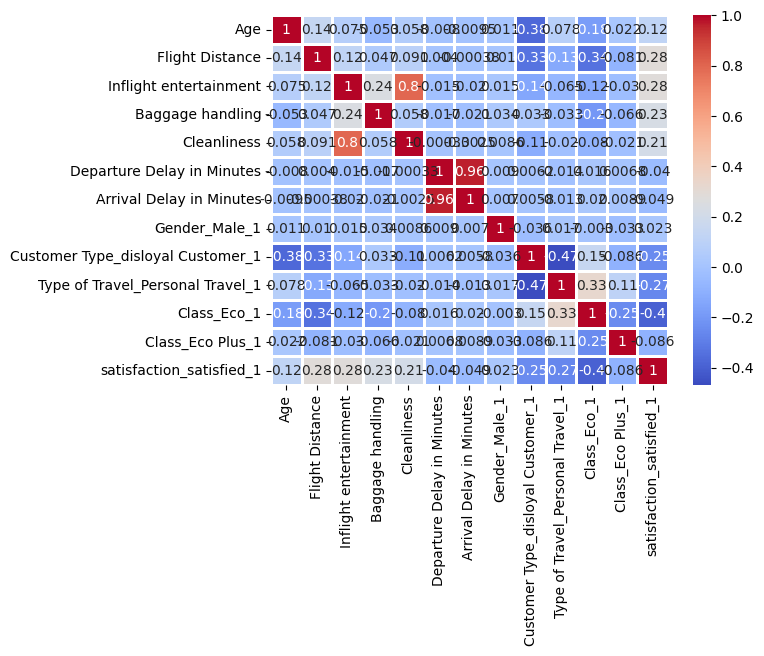

In [128]:
sns.heatmap(matrix,annot=True,cmap='coolwarm',linewidths=1)

In [129]:
## divide the data into x and y or independent and dependent variable
x = final_df.drop("satisfaction_satisfied_1",axis=1)
y= final_df["satisfaction_satisfied_1"]

In [130]:
## trainning and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                                test_size=0.2,
                                               random_state=42) 

In [132]:
# Deep Learning

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense      # dense is work of InputLayer outputLayer and hidden layer

In [ ]:
## define your ANN model
model = Sequential()
# input layer
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))  # input layer with 64 neurons and relu activation function